In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

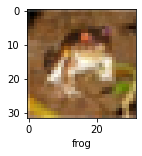

In [10]:
plot_sample(X_train, y_train, 0)

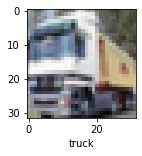

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.8128 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6241 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.5440 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.4840 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4316 - accuracy: 0.4962


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.52      0.57      1000
           1       0.61      0.57      0.59      1000
           2       0.32      0.51      0.40      1000
           3       0.37      0.35      0.36      1000
           4       0.38      0.43      0.40      1000
           5       0.45      0.28      0.34      1000
           6       0.56      0.48      0.52      1000
           7       0.60      0.49      0.54      1000
           8       0.65      0.59      0.62      1000
           9       0.48      0.66      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.3113 - accuracy: 0.0965


[2.3112752437591553, 0.09650000184774399]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[0.09933075, 0.08402458, 0.10201898, 0.11744785, 0.10216131,
        0.10210511, 0.0864363 , 0.11476578, 0.10639759, 0.08531178],
       [0.10104807, 0.07693686, 0.11509707, 0.12183843, 0.09912857,
        0.10328018, 0.08175272, 0.10798762, 0.11171978, 0.0812107 ],
       [0.10199245, 0.08159766, 0.10685306, 0.11829702, 0.1017379 ,
        0.10180218, 0.0859989 , 0.10766814, 0.11205008, 0.08200255],
       [0.0954932 , 0.07801112, 0.10971079, 0.11960566, 0.1012503 ,
        0.10449713, 0.0824763 , 0.11690556, 0.11202626, 0.08002366],
       [0.09655391, 0.08486419, 0.10740418, 0.11861007, 0.09961519,
        0.10039574, 0.08717933, 0.1097092 , 0.10872907, 0.08693915]],
      dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:

classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

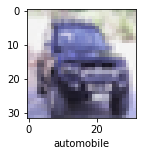

In [34]:
plot_sample(X_test, y_test,9)

In [35]:
classes[y_classes[9]]

'automobile'

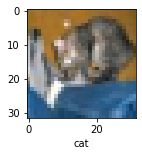

In [40]:
plot_sample(X_test, y_test,0)

In [41]:
classes[y_classes[0]]

'cat'

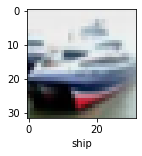

In [42]:
plot_sample(X_test, y_test,1)

In [43]:
classes[y_classes[1]]

'ship'

In [ ]:
plot_sample(X_test, y_test, 1)